In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json
filename = 'data_N10000000_k1000_Nexp10_-1.1372633383635353.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

In [4]:
data

{'pool_name': 'QE',
 'initial_energy': -1.1166512474115222,
 'fci_energy': -1.1372633383635353,
 'data_list': [{'energies_statevector': [-1.1166512474115222],
   'energies_uniform': [-1.1166502138738104],
   'energies_vmsa': [-1.1166351099152576],
   'energies_vpsr': [-1.1166682414786429],
   'std_uniform': [7.12559704165466e-05],
   'std_vmsa': [6.400936737341065e-05],
   'std_vpsr': [5.951807735253798e-05],
   'shots_uniform': [[2000000, 2000000, 2000000, 2000000, 2000000]],
   'shots_vmsa': [[2496606, 2500211, 2497688, 2500496, 1]],
   'shots_vpsr': [[1998825, 1999077, 1999081, 1999017, 1]]},
  {'energies_statevector': [-1.1166512474115213,
    -1.116651243785073,
    -0.16669246730467863,
    -0.16669248313035723,
    -1.1367682481117052,
    -1.136768247546139,
    -1.1372632894962993,
    -1.1372632895019195,
    -1.1372633383635302,
    -1.1372633383635282],
   'energies_uniform': [-1.1166643388892037,
    -1.1166560025916081,
    -0.16671235782853772,
    -0.16659741856946023,


In [75]:
shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

print(shots_uniform)
print(shots_vmsa)
print(shots_vpsr)

[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000 110000000]
[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000 110000000]
[ 8001001 16002002 24003003 26467451 28909230 38020903 44718231 50942854
 57457276 62973140 69661415]


In [85]:
std_uniform = np.concatenate([data['data_list'][0]['std_uniform'], data['data_list'][1]['std_uniform']])
std_vmsa = np.concatenate([data['data_list'][0]['std_vmsa'], data['data_list'][1]['std_vmsa']])
std_vpsr = np.concatenate([data['data_list'][0]['std_vpsr'], data['data_list'][1]['std_vpsr']])
# print(std_uniform)


In [113]:
print(error_uniform)
print(std_uniform)
print(std_vmsa)
print(std_vpsr)

[1.29349294e+01 1.29260658e+01 1.29312969e+01 6.09029863e+02
 6.09101989e+02 3.08495909e-01 3.05309053e-01 2.05680984e-02
 5.46648011e-02 1.60332310e-02 2.24860868e-02]
[0.04471379 0.03614388 0.04280672 0.21727992 0.30222764 0.05356264
 0.08770821 0.07218568 0.09235417 0.03404095 0.09681285]
[0.04016648 0.03857497 0.03017941 0.13608555 0.18653768 0.05328749
 0.09205555 0.05637328 0.07833705 0.07840523 0.03910768]
[0.03734815 0.03040234 0.03947181 0.24046811 0.30361952 0.06870842
 0.09126322 0.04649936 0.08352375 0.06919035 0.06406362]


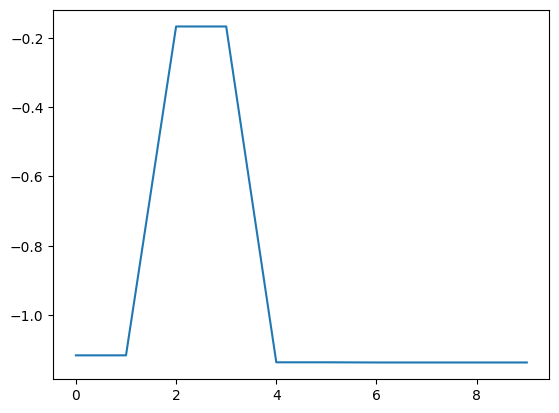

In [158]:
plt.plot(data['data_list'][1]['energies_statevector'])

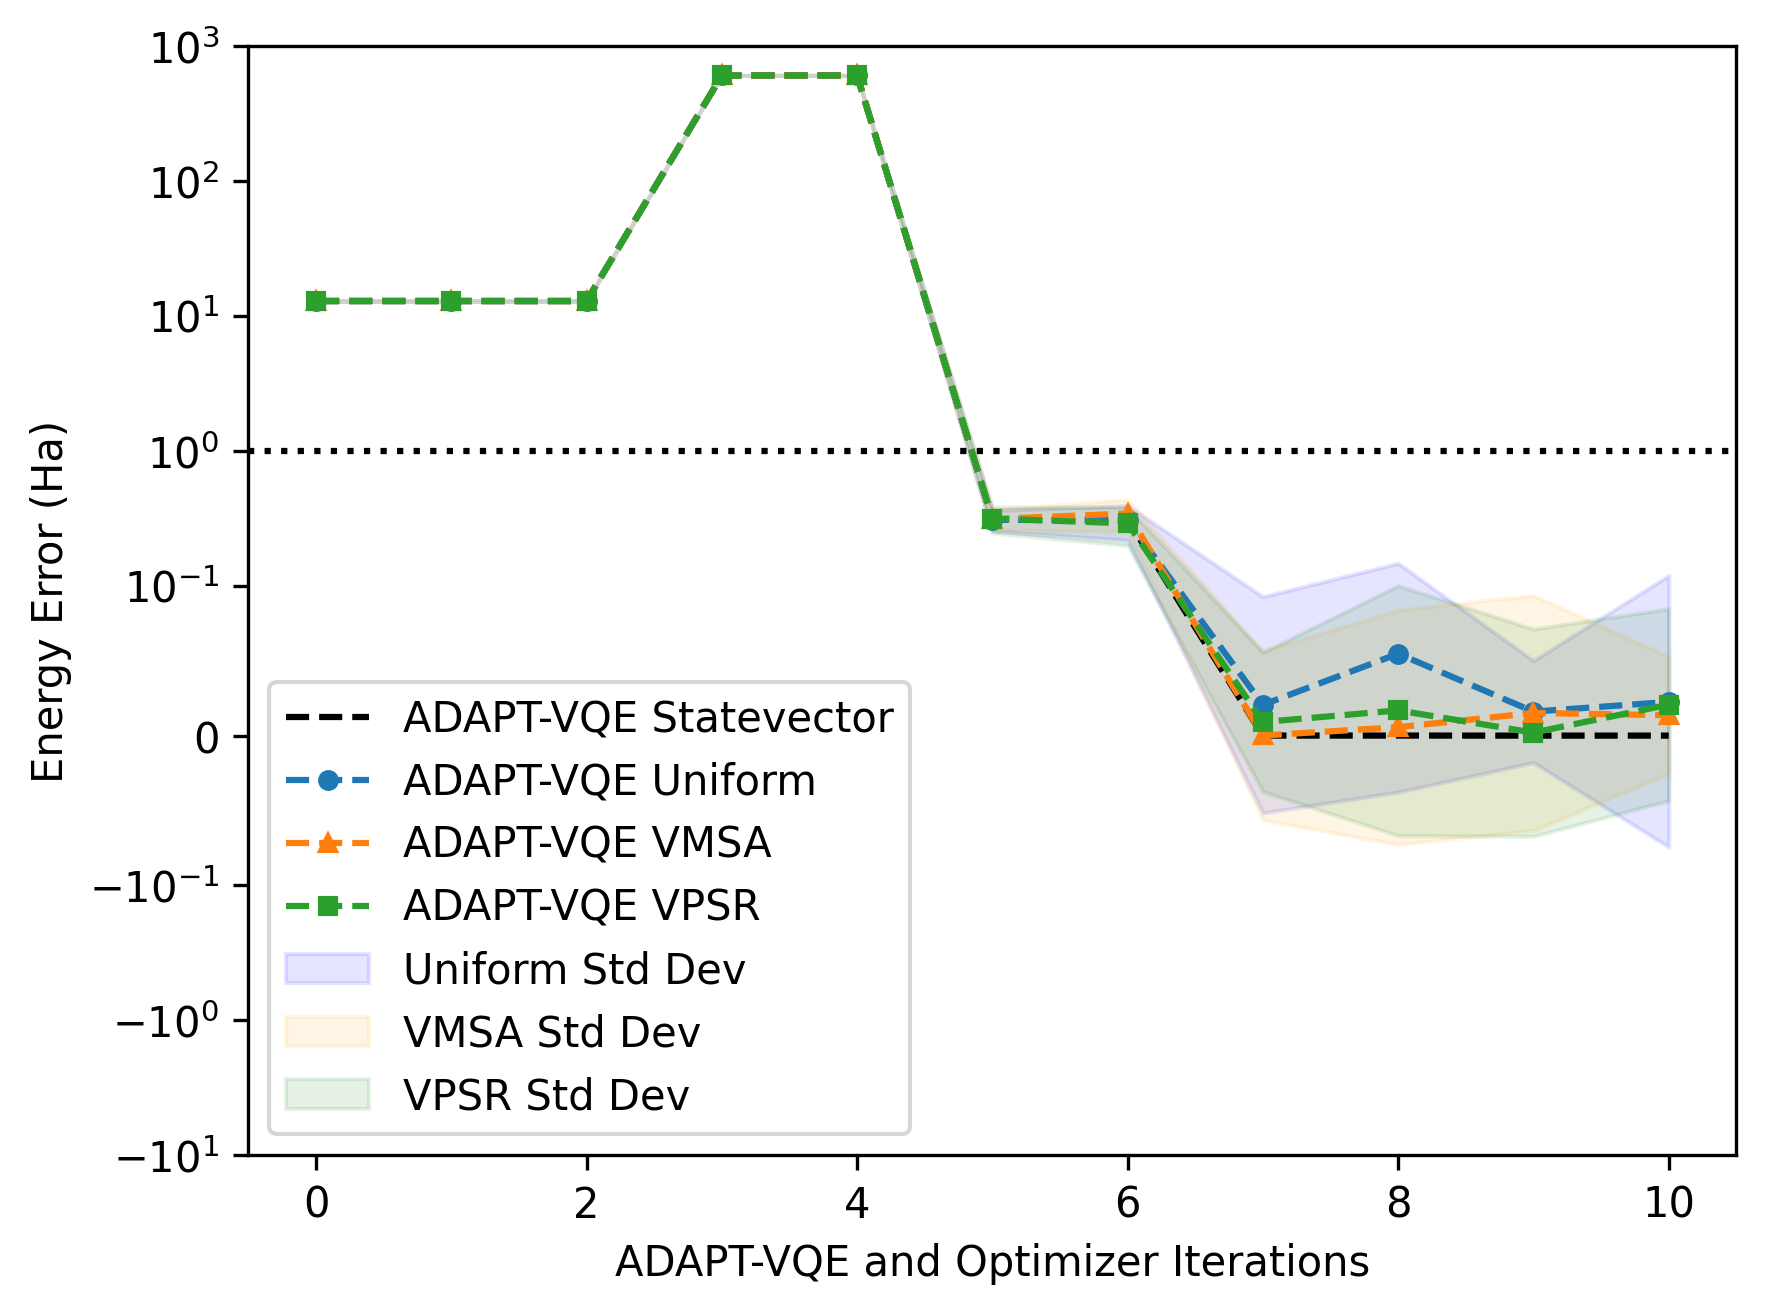

In [115]:

plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'], data['data_list'][1]['energies_statevector']])
energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'], data['data_list'][1]['energies_uniform']])
energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'], data['data_list'][1]['energies_vmsa']])
energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'], data['data_list'][1]['energies_vpsr']])

error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

std_uniform = np.concatenate([data['data_list'][0]['std_uniform'], data['data_list'][1]['std_uniform']])*chemac
std_vmsa = np.concatenate([data['data_list'][0]['std_vmsa'], data['data_list'][1]['std_vmsa']])*chemac
std_vpsr = np.concatenate([data['data_list'][0]['std_vpsr'], data['data_list'][1]['std_vpsr']])*chemac



# # Removing indices 2 and 3
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


x = range(len(error_statevector))
plt.plot(x, error_statevector, label='ADAPT-VQE Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='ADAPT-VQE Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='ADAPT-VQE VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='ADAPT-VQE VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e-1)
# plt.yscale('log')
plt.ylim(-10,1000)
plt.ylabel("Energy Error (Ha)")
plt.xlabel("ADAPT-VQE and Optimizer Iterations")
# plt.xticks([0,1])

plt.legend()

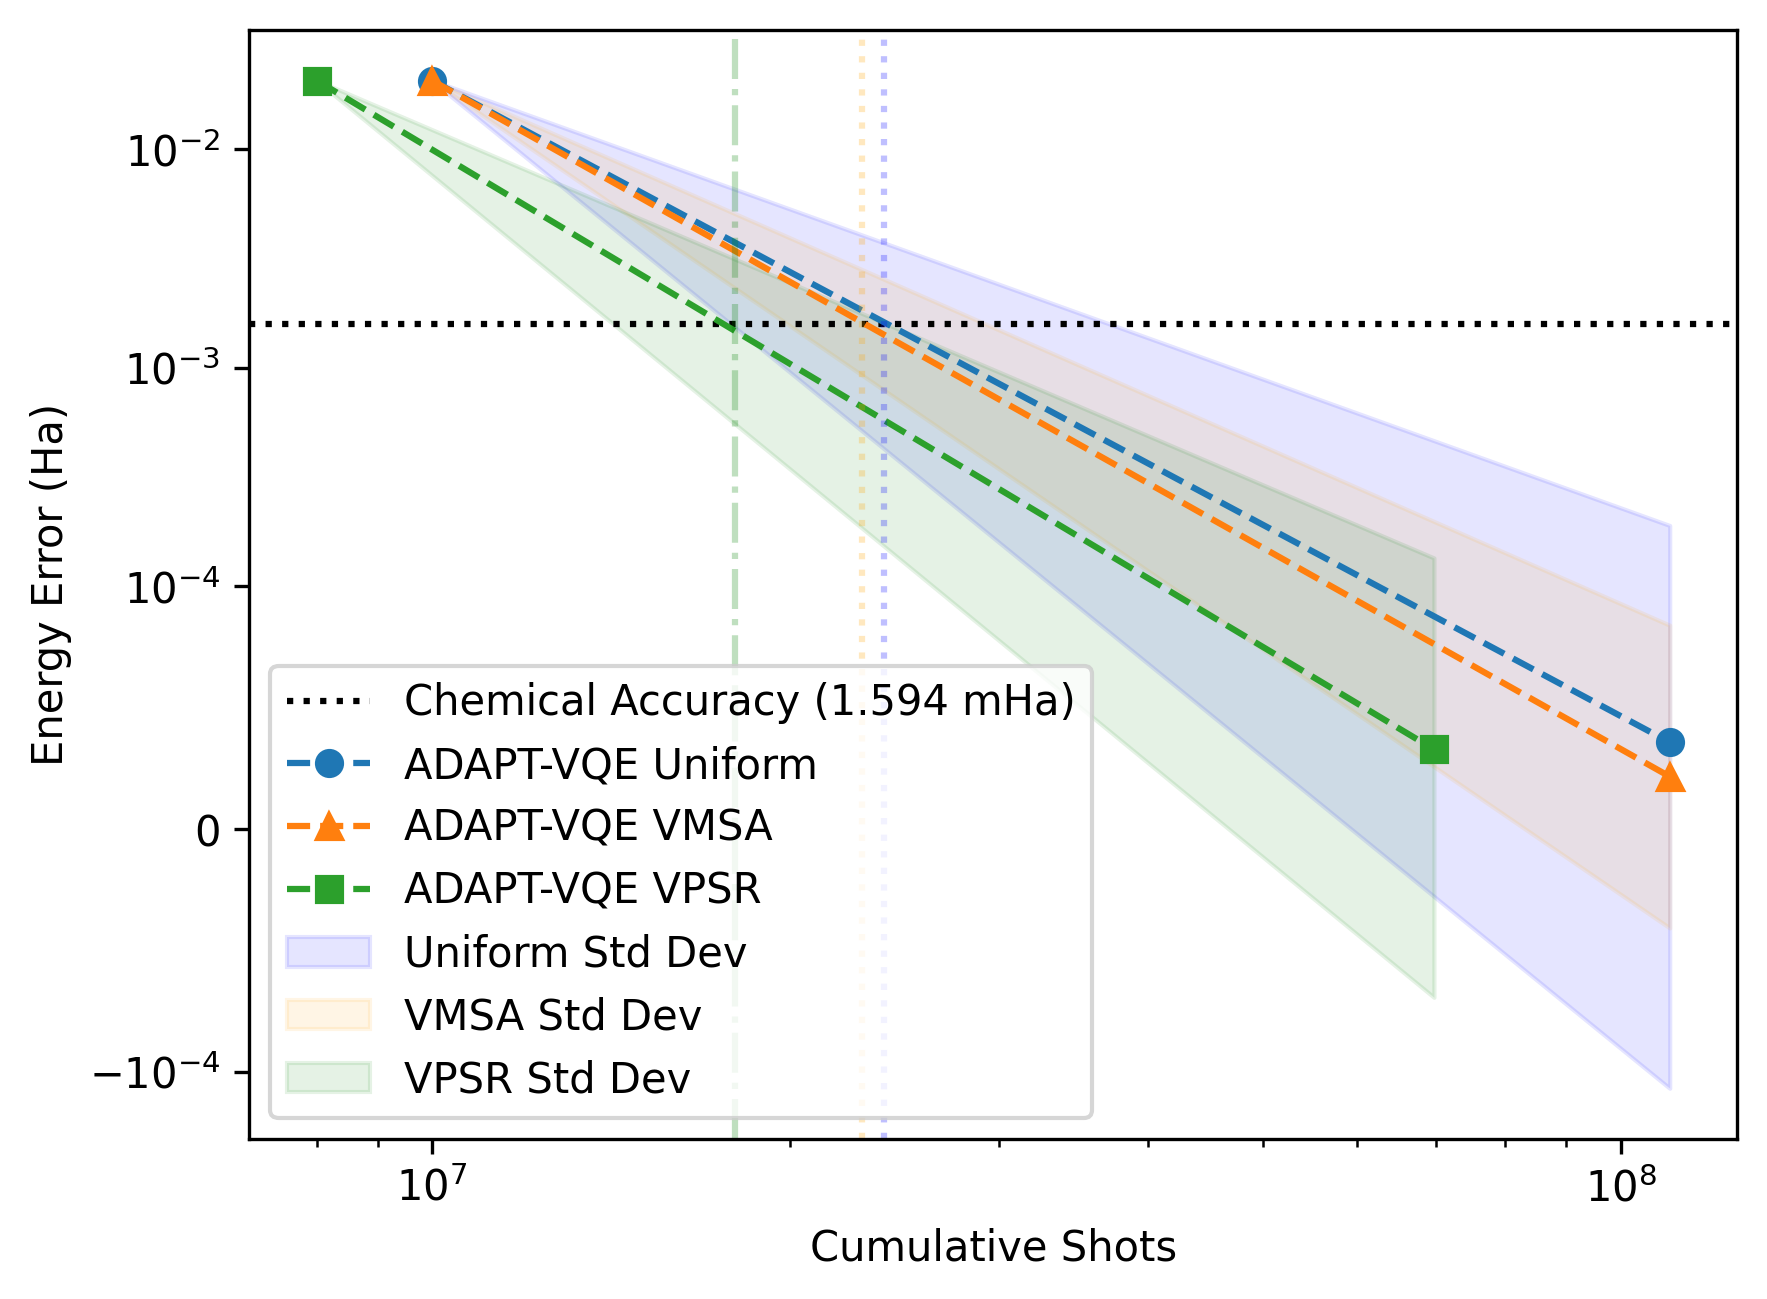

In [19]:
plt.rcParams['figure.dpi'] = 300

exact_energy = data['fci_energy']
chemac = 1

energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'], data['data_list'][1]['energies_statevector']])
energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'], data['data_list'][1]['energies_uniform']])
energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'], data['data_list'][1]['energies_vmsa']])
energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'], data['data_list'][1]['energies_vpsr']])

error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

std_uniform = np.concatenate([data['data_list'][0]['std_uniform'], data['data_list'][1]['std_uniform']])*chemac
std_vmsa = np.concatenate([data['data_list'][0]['std_vmsa'], data['data_list'][1]['std_vmsa']])*chemac
std_vpsr = np.concatenate([data['data_list'][0]['std_vpsr'], data['data_list'][1]['std_vpsr']])*chemac

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

# Hide indices 2 and 3
indices_to_remove = [1,2,3,4,5,6,7,8,9]

# Apply np.delete to remove indices 2 and 3 from all relevant arrays
shots_uniform = np.delete(shots_uniform, indices_to_remove)
shots_vmsa = np.delete(shots_vmsa, indices_to_remove)
shots_vpsr = np.delete(shots_vpsr, indices_to_remove)

error_statevector = np.delete(error_statevector, indices_to_remove)
error_uniform = np.delete(error_uniform, indices_to_remove)
error_vmsa = np.delete(error_vmsa, indices_to_remove)
error_vpsr = np.delete(error_vpsr, indices_to_remove)

std_uniform = np.delete(std_uniform, indices_to_remove)
std_vmsa = np.delete(std_vmsa, indices_to_remove)
std_vpsr = np.delete(std_vpsr, indices_to_remove)


plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

plt.plot(shots_uniform, error_uniform, label='ADAPT-VQE Uniform', linestyle='--', marker='o')
plt.plot(shots_vmsa, error_vmsa, label='ADAPT-VQE VMSA', linestyle='--', marker='^')
plt.plot(shots_vpsr, error_vpsr, label='ADAPT-VQE VPSR', linestyle='--', marker='s')


plt.fill_between(shots_uniform, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(shots_vmsa, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(shots_vpsr, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.yscale('symlog', linthresh=1e-4)
# plt.yscale('log')
# plt.ylim(-1e-3,1e-1)
plt.xscale('log')
plt.ylabel("Energy Error (Ha)")
plt.xlabel("Cumulative Shots")


plt.axvline(18000000, color='green', linestyle='dashdot', alpha=0.25)
plt.axvline(23000000, color='orange', linestyle='dotted', alpha=0.25)
plt.axvline(24000000, color='blue', linestyle='dotted', alpha=0.25)
# plt.xlim(22e6,27e6)
# plt.title("Energy Error vs Cumulative Shots for each ADAPT-VQE Iterations")
plt.legend()

In [102]:
print(shots_uniform[-1])
print(shots_vmsa[-1])
print(shots_vpsr[-1])

110000000
110000000
69661415


Text(0, 0.5, 'Number of Shots')

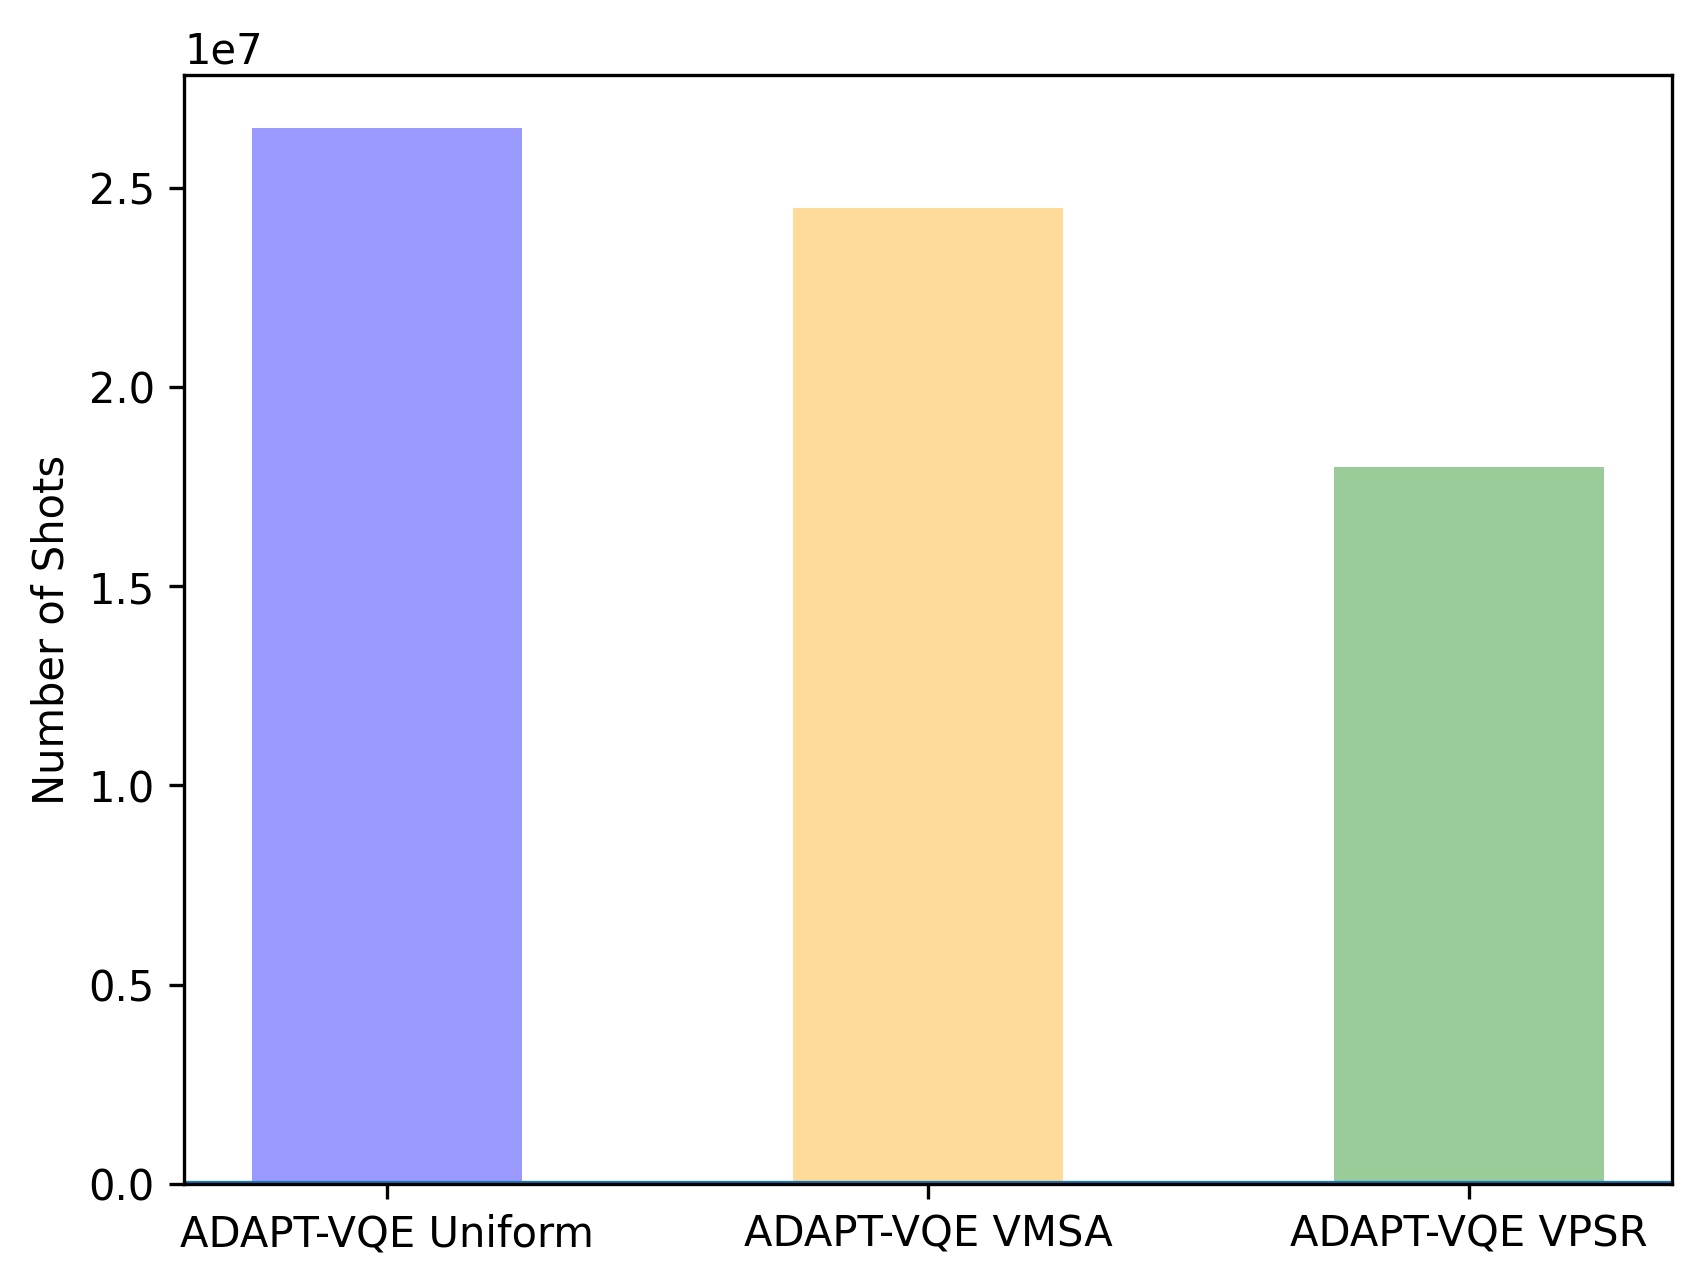

In [113]:
plt.rcParams['figure.dpi'] = 300
end_shots_uniform = shots_uniform[-1] - 26500000
end_shots_vmsa = shots_vmsa[-1] - 24500000
end_shots_vpsr = shots_vpsr[-1] - 18000000

w = 0.5
alp = 0.4

plt.bar('ADAPT-VQE Uniform', 26500000, width=w, alpha=alp, color='blue')
plt.bar('ADAPT-VQE VMSA', 24500000, width=w, alpha=alp, color='orange')
plt.bar('ADAPT-VQE VPSR', 18000000, width=w, alpha=alp, color='green')
# plt.bar("ADAPT-VQE Uniform", end_shots_uniform, bottom=26500000, width=w, alpha=0.25, color='blue')

plt.axhline()
plt.ylabel("Number of Shots")

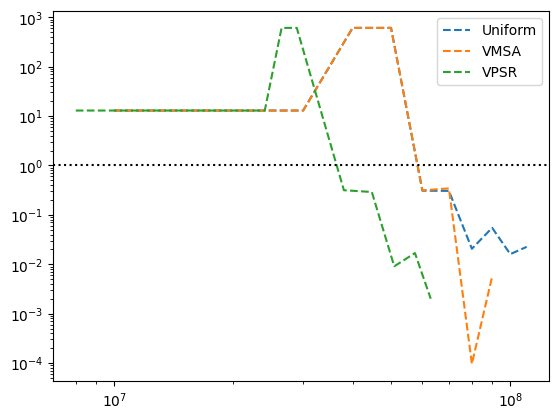

In [ ]:



# plt.plot(shots_u, error_statevector, label='Statevector', linestyle='--')
plt.plot(shots_uniform, error_uniform, label='Uniform', linestyle='--')
plt.plot(shots_vmsa[0:-2], error_vmsa[0:-2], label='VMSA', linestyle='--')
plt.plot(shots_vpsr[0:-1], error_vpsr[0:-1], label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.xscale('log')
plt.legend()

<class 'list'>


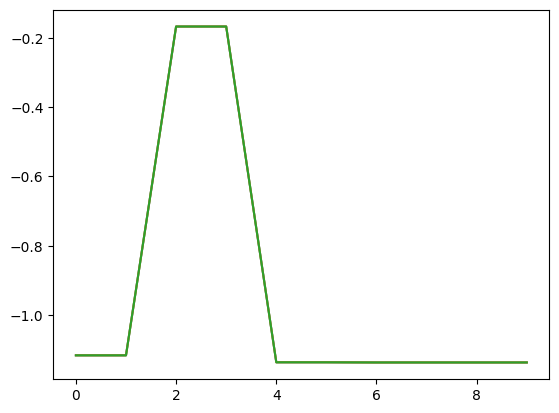

In [29]:
import matplotlib.pyplot as plt


plt.plot(data['data_list'][1]['energies_statevector'])
plt.plot(data['data_list'][1]['energies_uniform'])
plt.plot(data['data_list'][1]['energies_vpsr'])
print(type(data['data_list'][1]['energies_statevector']))
# plt.yscale('log')

In [82]:
exact_energy = data['fci_energy']
chemac = 627.5094
# energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'][-1], data['data_list'][1]['energies_statevector'][-1]])
# energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'][-1], data['data_list'][1]['energies_uniform'][-1]])
# energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'][-1], data['data_list'][1]['energies_vmsa'][-1]])
# energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'][-1], data['data_list'][1]['energies_vpsr'][-1]])

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])][-1])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])][-1])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])][-1])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

print(shots_uniform)
print(shots_vmsa)
print(shots_vpsr)



error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

print(error_statevector)
# print(energies_uniform)
plt.plot(error_statevector, label='Statevector', linestyle='--')
plt.plot(error_uniform, label='Uniform', linestyle='--')
plt.plot(error_vmsa, label='VMSA', linestyle='--')
plt.plot(error_vpsr, label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.legend()

TypeError: 'int' object is not iterable